In [1]:
%pip install numpy
%pip install pandas
%pip install sklearn
%pip install matplotlib
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("water_potability.csv")
desc = df.describe()
desc

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [3]:
imputer = KNNImputer(n_neighbors=3)
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [4]:
df_potable = df_filled.query('Potability == 1').drop(columns=['Potability'])
df_unpotable = df_filled.query('Potability == 0').drop(columns=['Potability'])

df_potable = df_potable.reset_index().drop(columns=['index'])
df_unpotable = df_unpotable.reset_index().drop(columns=['index'])

display(df_potable.describe())
display(df_unpotable.describe())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000
mean,7.067622,195.800744,22383.991018,7.169338,332.638612,425.383800,14.160893,66.565356,3.968328
std,1.391363,35.547041,9101.010208,1.702988,43.444485,82.048446,3.263907,16.080678,0.780842
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207
25%,6.233140,174.330531,15668.985035,6.094134,306.329450,360.939023,12.033897,56.717065,3.430909
50%,7.041030,196.632907,21199.386614,7.215163,333.142134,420.712729,14.162809,66.697224,3.958576
75%,7.887966,218.003420,27973.236446,8.199261,359.655180,484.155911,16.356245,77.204861,4.509569
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000
mean,7.085311,196.733292,21777.490788,7.092175,334.092525,426.730454,14.364335,66.304939,3.965800
std,1.589761,31.057540,8543.068788,1.501045,34.053413,80.047317,3.334554,15.769498,0.780282
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000
25%,6.095666,177.823265,15663.057382,6.155640,313.004398,368.498530,12.101057,55.995254,3.444062
50%,7.059692,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.481145,3.948076
75%,8.043015,216.120687,27006.249009,8.066462,354.052560,480.677198,16.649485,77.000519,4.496106
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000


In [5]:
def find_outliers(data_frame):
    clf = LocalOutlierFactor(n_neighbors=3)
    outliers = clf.fit_predict(data_frame)
    outliers_indexes = np.where(outliers == - 1)[0]
    rest_indexes = np.where(outliers == 1)[0]
    outliers = data_frame.loc[outliers_indexes]
    df_without_outliers = data_frame.loc[rest_indexes]
    df_without_outliers = df_without_outliers.reset_index().drop(columns=['index'])
    return outliers, df_without_outliers

In [6]:
outliers_potable, df_pot_clean = find_outliers(df_potable)
outliers_unpotable, df_unpot_clean = find_outliers(df_unpotable)

In [7]:
display(df_pot_clean.describe())
display(df_unpot_clean.describe())


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000
mean,7.053519,196.111842,22442.044846,7.159911,332.287693,425.553339,14.187774,66.557729,3.970242
std,1.376664,34.844169,9025.039294,1.705690,43.098507,80.232716,3.254620,16.124780,0.782532
min,0.227499,73.492234,728.750830,0.352000,129.000000,217.358330,2.200000,8.175876,1.492207
25%,6.215342,174.519217,15820.386485,6.086919,306.333536,362.595921,12.043794,56.796685,3.433837
50%,7.039094,196.791251,21226.665548,7.207846,333.061939,421.099917,14.182396,66.700476,3.959294
75%,7.883639,217.807732,27980.426315,8.185234,358.837925,482.296528,16.386262,77.291925,4.510990
max,11.491011,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000
mean,7.068952,197.156957,21758.245459,7.097606,333.889164,426.299014,14.367964,66.369303,3.960486
std,1.587592,30.525192,8383.777978,1.493119,33.168892,77.231055,3.340583,15.737804,0.778338
min,0.000000,98.452931,3413.081633,1.683993,203.444521,210.319182,4.371899,0.738000,1.450000
25%,6.086873,178.544525,15643.924307,6.167605,313.105285,369.241099,12.161396,56.006535,3.440020
50%,7.040245,197.517093,20855.272321,7.086469,333.148318,421.963539,14.298579,66.588849,3.941074
75%,8.035278,216.096228,27000.721100,8.068454,353.374790,479.164849,16.647555,77.029129,4.482006
max,14.000000,304.235912,49456.587108,12.653362,458.441072,672.556999,28.300000,120.030077,6.739000


In [8]:
display(df_pot_clean.describe())
display(outliers_potable)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000
mean,7.053519,196.111842,22442.044846,7.159911,332.287693,425.553339,14.187774,66.557729,3.970242
std,1.376664,34.844169,9025.039294,1.705690,43.098507,80.232716,3.254620,16.124780,0.782532
min,0.227499,73.492234,728.750830,0.352000,129.000000,217.358330,2.200000,8.175876,1.492207
25%,6.215342,174.519217,15820.386485,6.086919,306.333536,362.595921,12.043794,56.796685,3.433837
50%,7.039094,196.791251,21226.665548,7.207846,333.061939,421.099917,14.182396,66.700476,3.959294
75%,7.883639,217.807732,27980.426315,8.185234,358.837925,482.296528,16.386262,77.291925,4.510990
max,11.491011,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
13,13.175402,47.432000,19237.949676,8.907020,375.147315,500.245952,12.083896,62.532615,4.106924
18,6.869639,251.293448,21728.821295,8.803175,279.776857,539.466877,12.994140,56.409708,4.726702
28,10.761898,81.710895,25999.953669,8.477394,318.427241,392.704082,12.716350,52.246972,4.661799
50,7.780825,225.287704,22511.692615,7.057578,377.128970,291.353701,11.590025,72.508523,4.081701
51,10.049674,132.832837,11557.032038,8.550573,323.508072,442.768050,13.376149,92.176170,5.133478
90,6.848332,159.188050,12837.506063,5.164448,373.991711,558.815567,12.254081,69.772210,4.396605
113,4.812434,250.183954,11465.575643,4.362641,398.161904,607.026542,18.210032,62.511467,3.020996
136,4.212970,193.503415,42268.334296,9.005943,258.392683,384.684875,9.085279,75.439633,3.601735
169,7.098831,186.595255,29496.910157,8.117748,378.430501,616.175243,14.962780,65.444563,2.475284
283,11.898078,228.132673,8296.550611,9.899637,346.649750,500.169210,15.486862,63.529460,3.024968


In [9]:
display(df_unpot_clean.describe())
display(outliers_unpotable)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000
mean,7.068952,197.156957,21758.245459,7.097606,333.889164,426.299014,14.367964,66.369303,3.960486
std,1.587592,30.525192,8383.777978,1.493119,33.168892,77.231055,3.340583,15.737804,0.778338
min,0.000000,98.452931,3413.081633,1.683993,203.444521,210.319182,4.371899,0.738000,1.450000
25%,6.086873,178.544525,15643.924307,6.167605,313.105285,369.241099,12.161396,56.006535,3.440020
50%,7.040245,197.517093,20855.272321,7.086469,333.148318,421.963539,14.298579,66.588849,3.941074
75%,8.035278,216.096228,27000.721100,8.068454,353.374790,479.164849,16.647555,77.029129,4.482006
max,14.000000,304.235912,49456.587108,12.653362,458.441072,672.556999,28.300000,120.030077,6.739000


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1,3.716080,129.422921,18630.057858,6.635246,351.285226,592.885359,15.180013,56.329076,4.500656
8,7.607123,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017
84,6.395359,133.834229,23827.275015,5.127747,266.908428,573.400295,9.833875,95.026609,4.191218
108,6.098157,189.995846,27776.901052,6.443098,347.930400,245.859632,14.636882,73.424632,3.977362
126,7.216172,252.670469,29368.674184,9.906147,433.952212,465.216621,13.221034,84.198607,5.052737
...,...,...,...,...,...,...,...,...,...
1898,11.496859,186.125296,12253.303389,8.066980,325.409341,260.531758,9.674083,68.073928,5.005193
1902,10.337671,163.276225,21820.295875,7.899521,356.179637,561.206238,14.116324,56.193061,5.063109
1951,6.129386,216.237975,20886.786563,7.326370,303.498672,269.817539,15.252780,104.682553,3.860348
1962,10.817831,141.488391,23989.990151,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841


In [10]:
def clusterize(data_frame, eps):
    normalized_df=(data_frame-data_frame.min())/(data_frame.max()-data_frame.min())
    clustering = DBSCAN(eps=eps).fit(normalized_df)
    output = []
    for label in range(clustering.n_features_in_):
        tmp_indexes = np.where(clustering.labels_ == label)[0]
        tmp = data_frame.loc[tmp_indexes].reset_index().drop(columns=['index'])
        output.append(tmp)
    return output
    

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000
mean,7.053519,196.111842,22442.044846,7.159911,332.287693,425.553339,14.187774,66.557729,3.970242
std,1.376664,34.844169,9025.039294,1.705690,43.098507,80.232716,3.254620,16.124780,0.782532
min,0.227499,73.492234,728.750830,0.352000,129.000000,217.358330,2.200000,8.175876,1.492207
25%,6.215342,174.519217,15820.386485,6.086919,306.333536,362.595921,12.043794,56.796685,3.433837
50%,7.039094,196.791251,21226.665548,7.207846,333.061939,421.099917,14.182396,66.700476,3.959294
75%,7.883639,217.807732,27980.426315,8.185234,358.837925,482.296528,16.386262,77.291925,4.510990
max,11.491011,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249


'Cluster 0:'

'Number of elements: 286'

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,7.051516,196.532580,20675.773091,7.114197,334.065922,409.529491,14.591809,66.636073,3.963834
std,0.773678,20.547308,5758.806982,0.992122,26.027689,61.771778,2.504793,11.444672,0.571885
min,4.857803,135.259272,8406.723244,4.398831,252.231330,277.412711,8.630091,32.920720,2.460465
25%,6.541956,182.425664,16500.667032,6.409290,318.554833,368.416557,12.544882,58.679351,3.534385
50%,7.053111,197.398402,20128.295452,7.138656,335.041973,405.277825,14.592217,66.675007,3.968156
75%,7.589245,211.116030,24765.622893,7.792076,352.321375,450.241635,16.585945,74.719571,4.364202
max,8.832641,249.163567,41408.114822,9.674860,395.739529,571.822068,20.376838,96.795403,5.612296


'Cluster 1:'

'Number of elements: 6'

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,7.277269,216.195043,19914.092223,6.326765,342.295178,519.913078,14.142813,82.337348,5.018333
std,0.461403,13.783443,2017.887526,0.835021,26.524377,16.218572,1.356634,7.801136,0.323873
min,6.744799,195.665800,17444.671404,5.307071,304.527937,496.603425,12.014243,72.608076,4.531196
25%,6.896790,207.181531,18313.437705,5.788603,326.980138,511.836000,13.814356,75.681102,4.880462
50%,7.290771,220.025821,20237.711684,6.171424,342.660833,520.641507,14.050426,84.461392,5.022065
75%,7.646368,225.337203,21039.420456,6.991049,358.890346,526.424290,14.650970,87.323233,5.170309
max,7.806909,231.445054,22585.788809,7.385414,377.868040,544.339317,16.154964,91.461709,5.481691


'Cluster 2:'

'Number of elements: 5'

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,7.520964,196.004396,28798.040941,7.426924,312.566811,497.710388,13.891753,45.949220,4.156533
std,0.511132,5.467304,4016.179368,0.559216,16.097300,21.281202,1.586950,8.352414,0.252249
min,7.040395,186.713329,22505.518597,6.477057,284.315938,473.531611,12.049131,35.221200,3.931917
25%,7.255799,195.554428,28415.184347,7.489779,315.974147,489.272160,12.305634,43.280476,3.968177
50%,7.427435,198.511213,28474.202580,7.572435,318.515271,494.404511,14.690954,45.687421,4.052367
75%,7.503086,199.079217,32000.178936,7.641776,319.477187,499.866994,15.023962,47.144144,4.305514
max,8.378108,200.163795,32595.120244,7.953572,324.551514,531.476666,15.389083,58.412860,4.524693


'Cluster 3:'

'Number of elements: 4'

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,7.049805,168.007108,36791.478829,5.492068,294.926508,495.420000,15.507882,70.400863,4.438430
std,0.271663,6.943658,2111.702953,0.443697,7.150398,23.334456,1.343568,6.742199,0.180569
min,6.642756,162.478226,34510.752995,4.984432,284.624270,474.057490,14.299242,62.756891,4.275645
25%,7.037627,162.994994,36006.831442,5.302373,293.031681,477.010616,14.371449,66.892625,4.293318
50%,7.178091,166.031836,36515.537571,5.460640,297.193315,492.510999,15.477374,69.989047,4.416192
75%,7.190268,171.043950,37300.184957,5.650336,299.088142,510.920382,16.613807,73.497285,4.561304
max,7.200280,177.486533,39624.087179,6.062561,300.695130,522.600512,16.777540,78.868465,4.645692


'Cluster 4:'

'Number of elements: 7'

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,7.608513,188.414812,18715.992417,7.358831,320.833874,355.807324,15.848193,78.218610,2.454270
std,0.537173,9.633240,2359.515854,0.607420,13.676235,38.418657,1.145825,10.929977,0.187015
min,6.834260,174.614134,15736.893959,6.407648,305.177426,303.108146,13.791337,63.416787,2.188702
25%,7.280602,183.419793,16938.184685,7.015330,310.823052,333.197516,15.414388,72.842371,2.297334
50%,7.511817,186.582706,18608.940874,7.434493,318.183297,354.926227,16.140368,74.462646,2.558773
75%,8.050740,193.190490,20559.586411,7.771795,329.640249,376.637373,16.375707,84.680392,2.589450
max,8.250830,204.486282,21670.569891,8.095427,341.549794,412.947116,17.425460,94.605311,2.658843


<AxesSubplot:title={'center':'Turbidity'}>

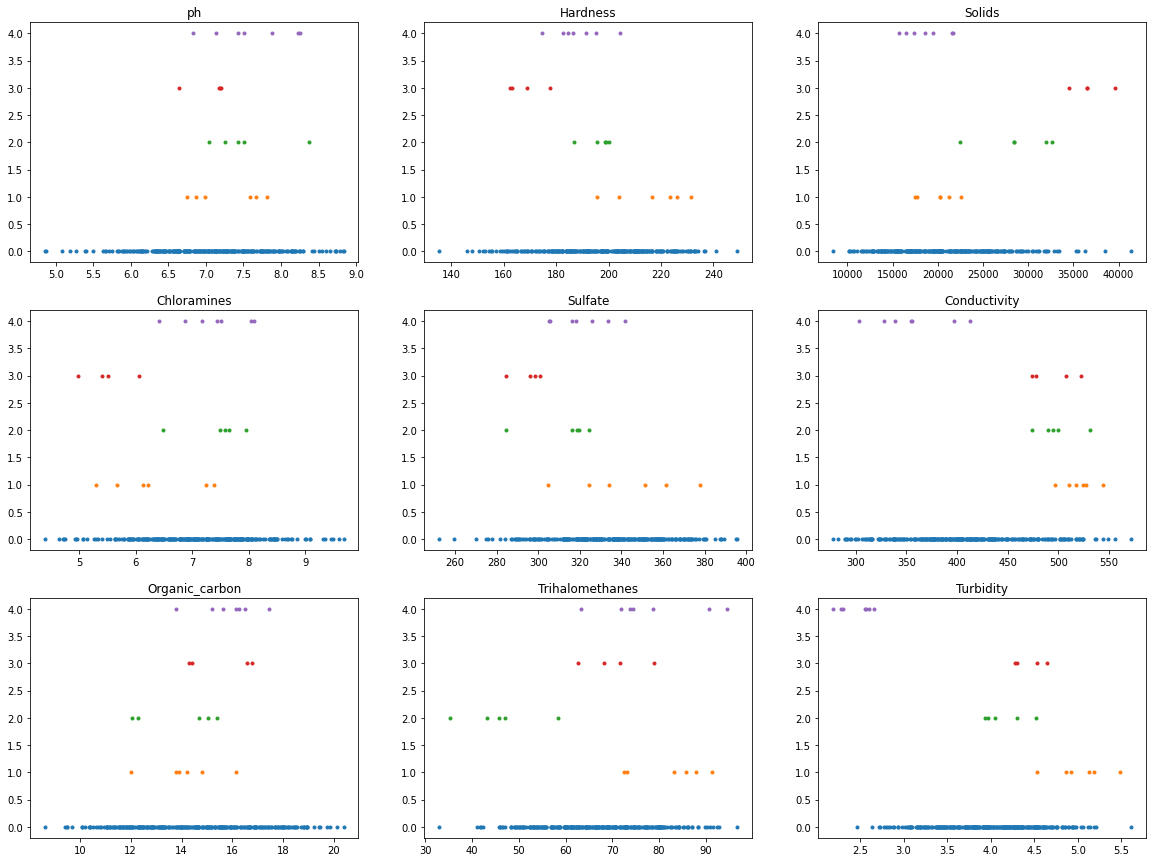

In [11]:
display(df_pot_clean.describe())
clusters = clusterize(df_pot_clean, 0.2)
for i, cluster in enumerate(clusters):
    if(len(cluster)):
        display(f'Cluster {i}:')
        display(f'Number of elements: {len(cluster)}')
        # print(f'Labels: {len(df_without_outliers)}')
        # print(tmp[['ph', 'Hardness', 'Potability']].describe())
        display(cluster.describe())
        # print(tmp[['ph', 'Hardness', 'Potability']])

for i, col in enumerate(df_pot_clean.columns):
    ax = plt.subplot(3,3,i+1)
    for j, cluster in enumerate(clusters):
        ax.set_title(col)
        ax.plot(cluster[col], [j for _ in range(len(cluster))], '.')
ax

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000
mean,7.053519,196.111842,22442.044846,7.159911,332.287693,425.553339,14.187774,66.557729,3.970242
std,1.376664,34.844169,9025.039294,1.705690,43.098507,80.232716,3.254620,16.124780,0.782532
min,0.227499,73.492234,728.750830,0.352000,129.000000,217.358330,2.200000,8.175876,1.492207
25%,6.215342,174.519217,15820.386485,6.086919,306.333536,362.595921,12.043794,56.796685,3.433837
50%,7.039094,196.791251,21226.665548,7.207846,333.061939,421.099917,14.182396,66.700476,3.959294
75%,7.883639,217.807732,27980.426315,8.185234,358.837925,482.296528,16.386262,77.291925,4.510990
max,11.491011,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249


'Cluster 0:'

'Number of elements: 1012'

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,7.085053,197.174536,21114.935337,7.063913,333.503183,423.636442,14.442333,66.058514,3.961157
std,1.238207,22.291576,6526.845943,1.163126,24.652281,65.768398,2.800883,13.287334,0.652164
min,3.261670,120.327615,5576.628297,2.750837,259.122131,266.357744,5.051695,17.915723,1.680554
25%,6.253102,182.122279,16469.595117,6.293838,316.753040,374.508360,12.469317,58.092664,3.527024
50%,7.054475,196.867829,20518.709473,7.069786,333.025546,419.327009,14.352468,66.141672,3.947064
75%,7.903980,212.309380,25457.281431,7.844186,349.674512,472.262776,16.413958,75.523137,4.409459
max,10.695532,261.566173,44652.363872,11.208688,416.530533,617.540906,22.846529,101.248253,5.989543


'Cluster 1:'

'Number of elements: 8'

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,7.759699,216.158207,40185.719405,6.345753,310.068317,354.411815,14.659793,68.124353,3.184292
std,0.821988,16.373600,2360.880040,0.722875,14.780537,31.424673,1.094110,8.281690,0.309591
min,6.057828,191.773620,37376.792989,5.311112,289.749038,293.833466,13.514887,54.463525,2.590635
25%,7.530732,204.559972,38600.149726,5.850009,301.022369,343.448357,13.976561,64.218486,3.086229
50%,7.920797,218.697859,39962.838080,6.525746,310.323700,352.532858,14.315025,70.767218,3.252371
75%,8.195156,225.445506,41052.330176,6.756402,322.056194,373.358729,15.005692,74.013326,3.356593
max,8.641634,240.134572,44868.458368,7.307411,329.485933,397.236784,16.697408,76.701609,3.572519


'Cluster 2:'

'Number of elements: 5'

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,7.282188,201.237985,26492.125713,7.322659,336.855399,327.012906,9.249224,57.865174,2.240633
std,1.108301,12.596970,3690.942971,0.149996,8.178622,28.524394,0.929890,3.948833,0.235348
min,5.584087,188.313324,19991.239149,7.157952,326.678363,280.467916,8.399735,52.415462,1.961475
25%,6.906992,192.179739,27080.268722,7.225366,329.708632,327.380488,8.547283,54.917862,2.124759
50%,7.617149,196.606942,28086.873498,7.302352,340.106028,329.016646,9.003647,60.144702,2.165682
75%,7.786735,212.304629,28553.559458,7.382755,342.604083,341.740345,9.614106,60.725201,2.391540
max,8.515977,216.785291,28748.687739,7.544869,345.179887,356.459137,10.681349,61.122644,2.559708


'Cluster 3:'

'Number of elements: 5'

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,6.790774,193.032813,19912.032760,7.763835,343.327946,456.392711,4.805907,69.536575,3.563802
std,1.198270,12.013165,2188.561543,0.549653,9.401596,31.417283,0.400637,5.383492,0.280837
min,5.122648,175.873676,17279.513749,7.027441,331.214867,428.660965,4.371899,61.911364,3.293553
25%,6.001382,186.884422,18752.269677,7.487278,336.466042,444.891044,4.466772,65.954766,3.442121
50%,7.215791,195.018888,19214.186357,7.710120,344.589628,446.712219,4.861631,72.305219,3.504525
75%,7.593177,201.068737,21759.363929,8.202453,351.386080,451.211449,4.966862,72.837540,3.542093
max,8.020869,206.318343,22554.830087,8.391883,352.983112,510.487880,5.362371,74.673986,4.036720


'Cluster 4:'

'Number of elements: 6'

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,7.223056,192.626124,30533.349603,5.509723,316.150208,468.095367,15.434972,43.042914,4.671206
std,0.414157,12.129699,2982.233847,0.543370,18.154448,32.179261,0.620019,9.221875,0.284711
min,6.490923,173.272818,25396.011782,4.737826,297.512799,436.396995,14.567819,31.555010,4.308570
25%,7.108787,188.424256,30289.783899,5.120574,303.391354,446.997623,15.035719,37.309295,4.452305
50%,7.317610,192.883258,30554.893149,5.657466,310.452178,462.347535,15.444937,43.251255,4.718112
75%,7.501279,198.942070,31604.479299,5.917254,328.857644,475.372622,15.964281,46.099791,4.831959
max,7.610509,208.817812,34538.544038,6.060119,342.453546,525.884833,16.115432,57.822023,5.048834


<AxesSubplot:title={'center':'Turbidity'}>

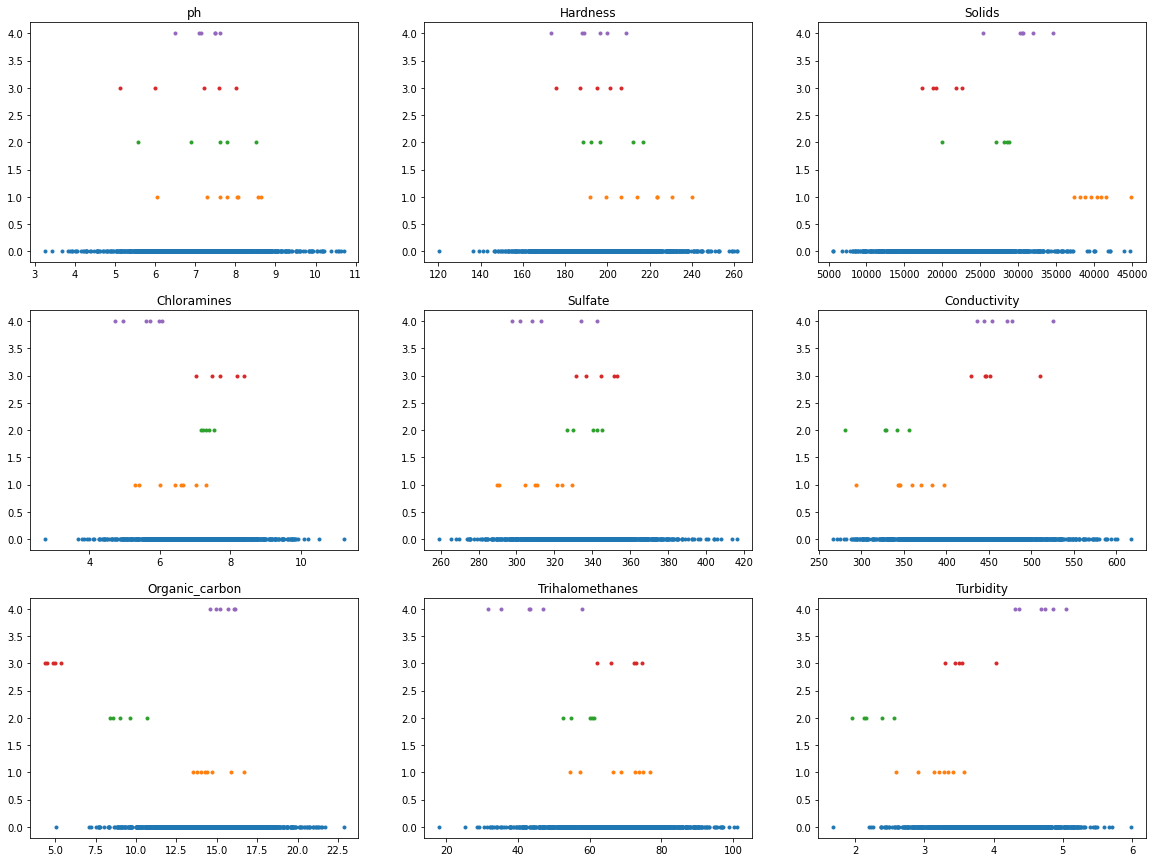

In [12]:
display(df_pot_clean.describe())
clusters = clusterize(df_unpot_clean, 0.22)
for i, cluster in enumerate(clusters):
    if(len(cluster)):
        display(f'Cluster {i}:')
        display(f'Number of elements: {len(cluster)}')
        # print(f'Labels: {len(df_without_outliers)}')
        # print(tmp[['ph', 'Hardness', 'Potability']].describe())
        display(cluster.describe())
        # print(tmp[['ph', 'Hardness', 'Potability']])
    plt.plot(cluster['Hardness'], [i for _ in range(len(cluster))], '.')
    
for i, col in enumerate(df_pot_clean.columns):
    ax = plt.subplot(3,3,i+1)
    for j, cluster in enumerate(clusters):
        ax.set_title(col)
        ax.plot(cluster[col], [j for _ in range(len(cluster))], '.')
ax

In [13]:
df_filed_np = df_filled.drop('Potability', axis=1)
df_cov = df_filed_np.cov()
display(df_cov)
e_val, e_vec = np.linalg.eig(df_cov)
e_val_df = pd.DataFrame([e_val], columns=df_cov.columns)
e_val_df_perc = 100 * e_val_df / sum(e_val)
display(e_val_df_perc)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,2.296024,3.938078,-1.398610e+03,-0.070815,1.593081,2.412264,0.184875,-0.101250,-0.038641
Hardness,3.938078,1081.078715,-1.352149e+04,-1.564367,-136.262905,-63.552473,0.392670,-8.167795,-0.370747
Solids,-1398.610275,-13521.486526,7.688783e+07,-973.746052,-61373.855414,9802.117116,297.108377,-517.436997,133.751106
Chloramines,-0.070815,-1.564367,-9.737461e+02,2.506158,1.861253,-2.621264,-0.066268,0.303727,0.002920
Sulfate,1.593081,-136.262905,-6.137386e+04,1.861253,1443.565847,-35.169521,3.497015,-19.417865,-0.329497
Conductivity,2.412264,-63.552473,9.802117e+03,-2.621264,-35.169521,6532.529330,5.605967,2.856813,0.365712
Organic_carbon,0.184875,0.392670,2.971084e+02,-0.066268,3.497015,5.605967,10.943936,-0.540893,-0.070499
Trihalomethanes,-0.101250,-8.167795,-5.174370e+02,0.303727,-19.417865,2.856813,-0.540893,252.481873,-0.304986
Turbidity,-0.038641,-0.370747,1.337511e+02,0.002920,-0.329497,0.365712,-0.070499,-0.304986,0.608997


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,99.987941,0.008495,0.001889,0.001327,0.000328,0.000014,0.000003,0.000003,7.893827e-07
